## Why and How does a Machine Learning algorithm "learn"?

In this lesson, we’ll explore how a supervised learning algorithm learns, using a simple example of predicting house prices based on the square footage of a house. This is something you’re already familiar with: we’ll model this relationship using a function like  

$$y = wx + b$$

where:

- y  is the predicted price,
- x  is the square footage,
- w  is the weight (or slope),
- b  is the bias (or intercept).



Note: This equation should be familiar to you from the equation

$$
y = mx + c
$$

that you have learned in your basic algebra class, where m is the slope and c is the intercept.

### Step 1: Understanding Supervised Learning

Supervised learning works by using labeled data. Labeled data means that for every input (in this case, square footage), we know the correct output (in this case, the house price). The algorithm learns by looking at these labeled examples and trying to find the relationship between the input and output.

Let’s create a simple dataset of house square footage and prices, and plot it using matplotlib.

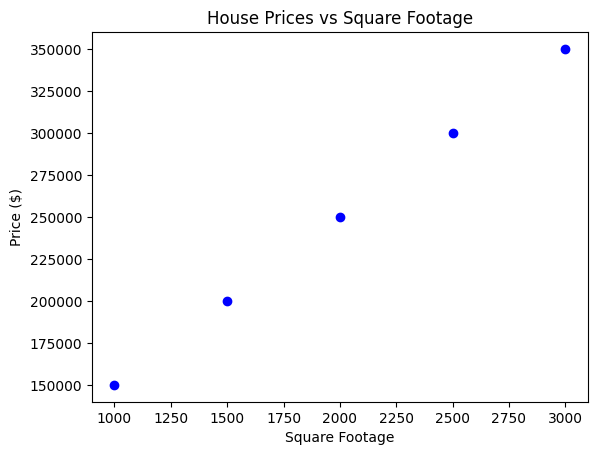

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example dataset of house square footage and prices
square_footage = np.array([1000, 1500, 2000, 2500, 3000])
prices = np.array([150000, 200000, 250000, 300000, 350000])
# If the square footage is 1000, the price is 150000
# If the square footage is 1500, the price is 200000
# and so on...

# Plotting the data points
plt.scatter(square_footage, prices, color='blue')
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.title('House Prices vs Square Footage')
plt.show()

### Explanation:

In this plot, each blue dot represents a house: its square footage and corresponding price.

The goal of the algorithm is to fit a line through these points in such a way that the line best represents the relationship between square footage and price.

This relationship can be modeled by a simple equation like:
$$ y = wx + b $$
Where  w  is the slope (how much price increases with square footage) and  b  is the intercept (the price when square footage is zero).

#### Fitting the Line (Finding  w  and  b )

The algorithm adjusts  w  and  b  to minimize the difference between the predicted price (on the line) and the actual price (the dots). This process is called fitting.

We will not go into the details here of how the algorithm finds the best values of  w  and  b.  This is discussed in detail in other lessons.

Let’s assume we’ve used some optimization method (like Gradient Descent) to find the values of  w  and  b , and then plot the line.

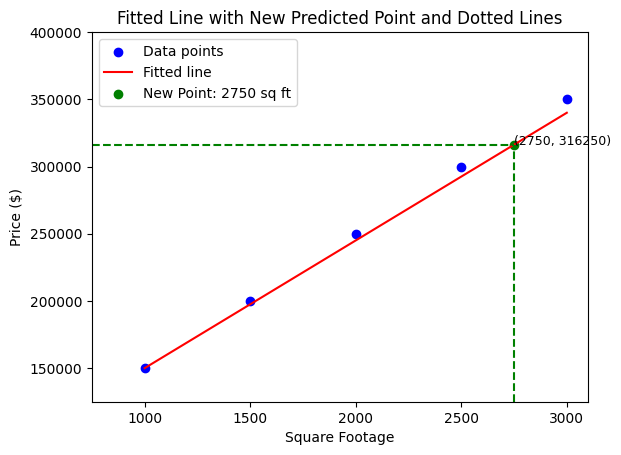

In [8]:
# Fitting a line to the data (assuming we found w and b)
w = 95  # Example weight (slope)
b = 55000 # Example bias (intercept)

# Predicted prices using the fitted line
predicted_prices = w * square_footage + b

# Plotting the data points and the fitted line
plt.scatter(square_footage, prices, color='blue', label='Data points')
plt.plot(square_footage, predicted_prices, color='red', label='Fitted line')

# New data point (not in the original dataset)
new_square_footage = 2750
new_predicted_price = w * new_square_footage + b

# Plotting the new point
plt.scatter(new_square_footage, new_predicted_price, color='green', label=f'New Point: {new_square_footage} sq ft')

# Adding dotted lines to connect the new point to the x and y axes
plt.plot([new_square_footage, new_square_footage], [125000, new_predicted_price], 'g--')  # Dotted line to x-axis
plt.plot([750, new_square_footage], [new_predicted_price, new_predicted_price], 'g--')  # Dotted line to y-axis

# Annotating the new point on the plot
plt.text(new_square_footage, new_predicted_price, f'({new_square_footage}, {new_predicted_price:.0f})', fontsize=9, ha='left')

# Set axis limits to start at 750 for x and 125000 for y
plt.xlim(750, 3100)
plt.ylim(125000, 400000)

plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.title('Fitted Line with New Predicted Point and Dotted Lines')
plt.legend()
plt.show()

### Explanation:

The red line represents the fitted model, which tries to minimize the difference between the predicted prices (on the line) and the actual prices (the blue dots).

The algorithm adjusts the line until it’s as close as possible to all of the data points.

Notice that our line does not go *exactly* through all the data points.  Different algorithms, optimization and loss functions will fit the data points differently.  But the goal is to get as close as possible to all the data points.

### Step 2: Why Does the Algorithm Work on New Data?

Now that we’ve fitted a line to the data, the question is: why does this model work on new, unseen data?

The reason the algorithm works is that **it has learned the relationship between square footage and price. So when we give the model a new square footage that it hasn’t seen before, it uses the same relationship (represented by the line) to predict the price**. As long as the relationship between square footage and price is consistent (meaning similar houses follow similar patterns), the model will make reasonable predictions for new inputs.

Notice in the plot above, we have added a new data point (green dot) for a house with 2750 square feet.  Our model has predicted a price of $316,250 for this house based on the relationship it has learned from the data.

Now our simple example is for a linear relationship between square footage and price.  But most real world relationships are more complex than that.  For example, the price of a house is not just dependent on the square footage, but also on other factors like the number of bedrooms, the location, the age of the house, etc.  A more complex model, such as a neural network, can learn these relationships.


### Advanced Concepts

#### Loss Function

The process of fitting the line (finding the best values of  w  and  b ) involves minimizing a loss function. A loss function measures how good or bad the model’s predictions are. In our case, we used the sum of squared differences between the predicted prices and the actual prices. This is a common loss function for linear regression problems.

#### Generalization

The ability of the algorithm to make reasonable predictions on new, unseen data is called generalization. It’s the key skill that a machine learning model needs to have to be useful in practice.

### Learnability and PAC Learning (Briefly Explained)

The concept of learnability asks the question: can a machine learning algorithm learn a good model from the data? In our example, the model can learn a good approximation of house prices from the data points we provided.

Probably Approximately Correct (PAC) Learning is a framework in machine learning that helps us understand how well an algorithm learns. It means that the algorithm is able to learn a function that, with high probability, is approximately correct. This means that while the model might not be perfect, it will get close to the correct prediction for most data points.

In simple terms:
  - PAC learning ensures that, given enough data, the model will be “probably” close to the true relationship (approximately correct) most of the time.

For our house price example, PAC learning would mean that as long as we give the model enough examples of houses and prices, it will be able to predict prices for new houses reasonably well most of the time.

### Summary

- How does an algorithm learn? By using labeled examples (like square footage and price) and fitting a function (like a line) through the data to minimize the difference between predicted and actual values.
- Why does it work on new data? Because the model learns the underlying relationship from the data, allowing it to make good predictions on new, unseen data, as long as the pattern holds.
- Learnability and PAC Learning: These concepts explain that with enough data and the right model, the algorithm will likely learn a function that is approximately correct for most new data points.

This process of fitting and learning is the core of supervised learning, where the algorithm gets better as it sees more examples and learns the correct relationship between inputs and outputs.